In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from langdetect import detect
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from string import punctuation
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
df = pd.read_csv('data.csv')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [3]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
from googletrans import Translator

In [6]:
def lang_detect(data):
    lang = detect(data)
    return lang


lang_detect(df.Review[16240])

'af'

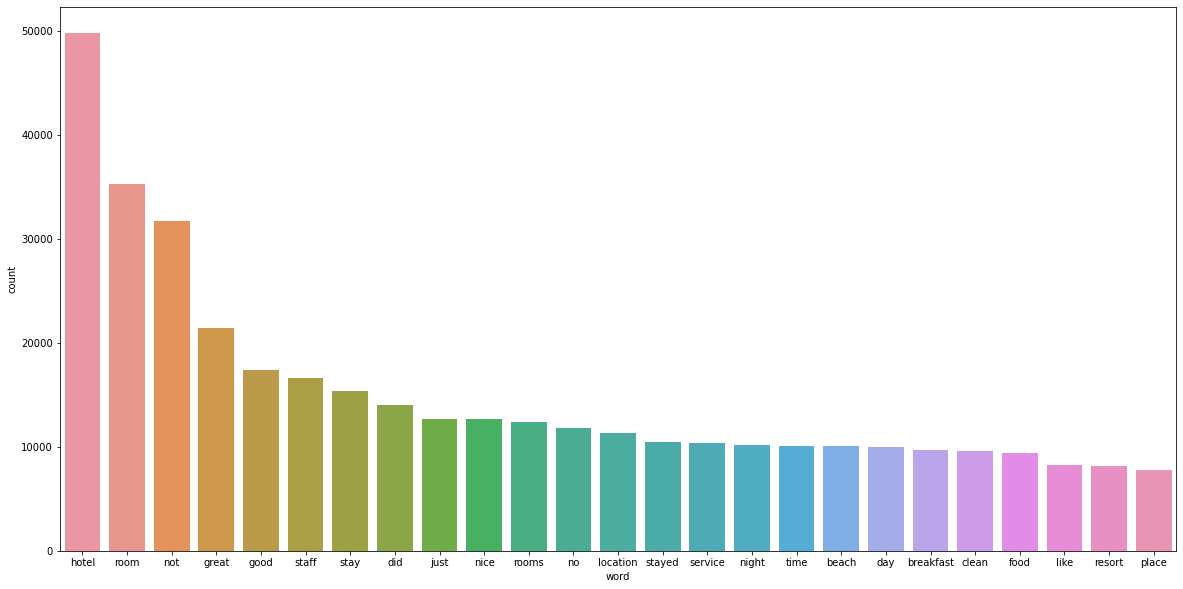

In [19]:
def get_ngrams(data, n=None):
    cv = CountVectorizer()
    vectors = cv.fit_transform(data)
    sum_of_words = vectors.sum(axis = 0)
    word_freq = [(word, sum_of_words[0,i]) for word, i in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x : x[1], reverse=True)
    return word_freq[:n]

common_words =  get_ngrams(df.Review, 25)
df_ngrams = pd.DataFrame(common_words, columns=['word', 'count'])
fig, ax = plt.subplots(figsize= (20, 10))
fig = sns.barplot(x = 'word', y = 'count', data = df_ngrams, ax = ax)
ax.set_xticklabels(labels = df_ngrams['word'])
plt.show()

In [22]:
stop = stopwords.words('english')
def clean_text(data):
    tokens = word_tokenize(data)
    text = [i.lower() for i in tokens if (i not in stop) and (i not in punctuation) and (i.isalpha())]
    string = ' '.join(text)
    return string
df['clean_text'] = df['Review'].apply(clean_text)

In [23]:
df

,Review,Rating,clean_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret time staying charm ca beat ti...
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,ok looks nice modern outside desk staff partic...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...


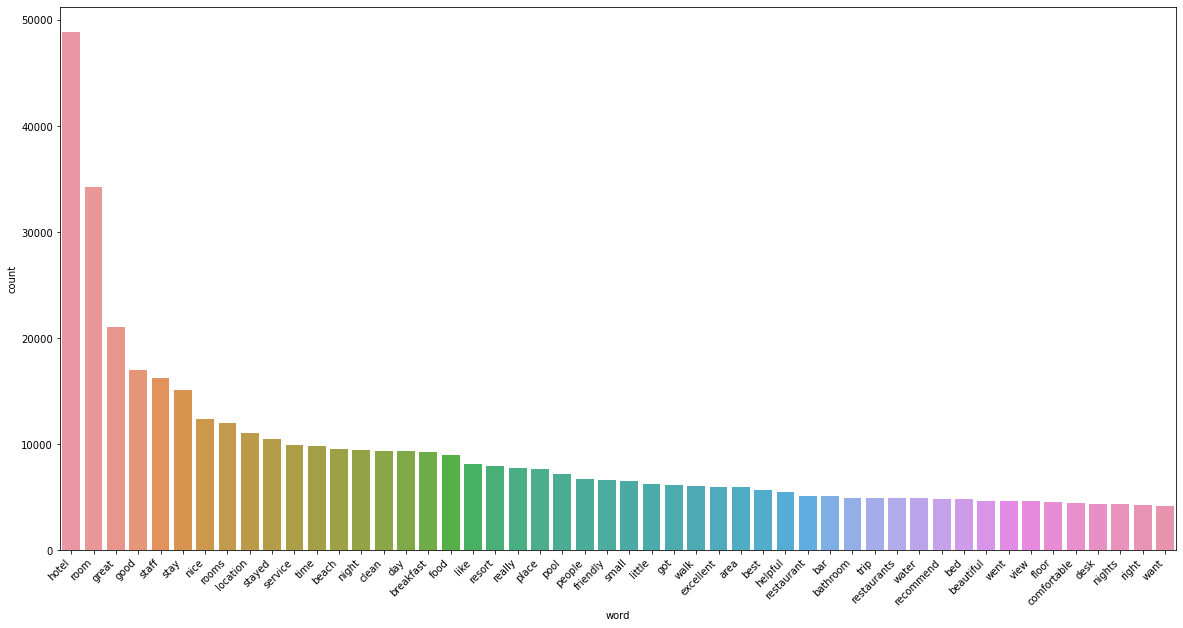

In [26]:
def get_ngrams(data, n=None):
    cv = CountVectorizer()
    vectors = cv.fit_transform(data)
    sum_of_words = vectors.sum(axis = 0)
    word_freq = [(word, sum_of_words[0,i]) for word, i in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x : x[1], reverse=True)
    return word_freq[:n]

common_words =  get_ngrams(df.clean_text, 50)
df_ngrams = pd.DataFrame(common_words, columns=['word', 'count'])
fig, ax = plt.subplots(figsize= (20, 10))
fig = sns.barplot(x = 'word', y = 'count', data = df_ngrams, ax = ax)
ax.set_xticklabels(labels = df_ngrams['word'], rotation = 45, ha = 'right')
plt.show()

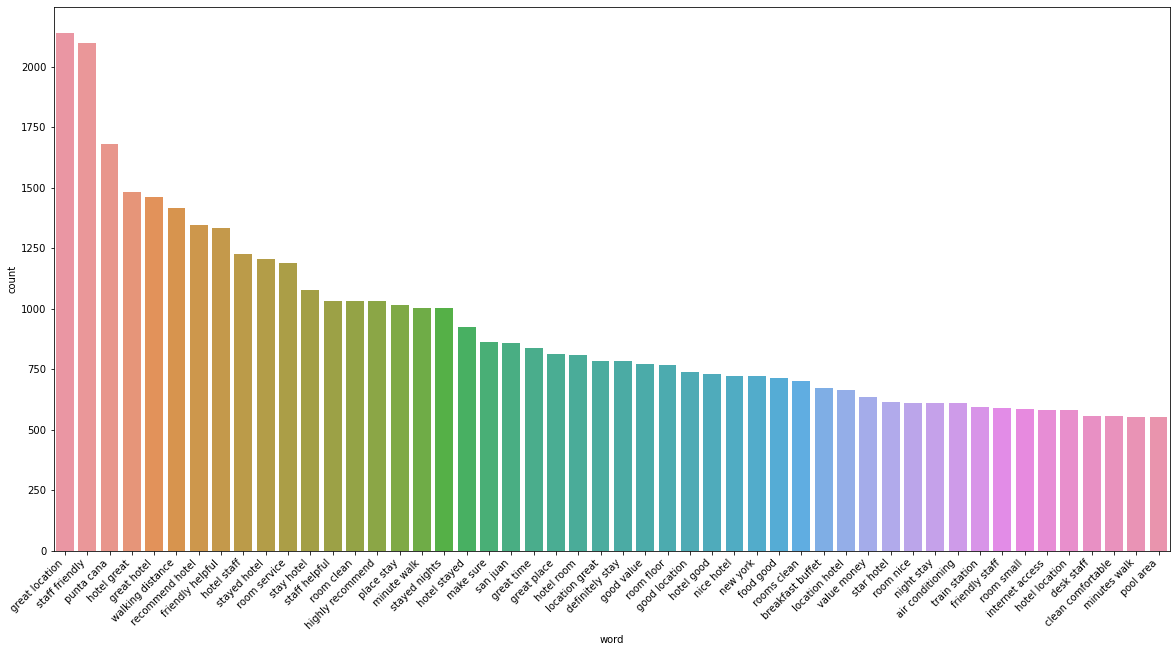

In [27]:
def get_ngrams(data, n=None):
    cv = CountVectorizer(ngram_range=(2,2))
    vectors = cv.fit_transform(data)
    sum_of_words = vectors.sum(axis = 0)
    word_freq = [(word, sum_of_words[0,i]) for word, i in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x : x[1], reverse=True)
    return word_freq[:n]

common_words =  get_ngrams(df.clean_text, 50)
df_ngrams = pd.DataFrame(common_words, columns=['word', 'count'])
fig, ax = plt.subplots(figsize= (20, 10))
fig = sns.barplot(x = 'word', y = 'count', data = df_ngrams, ax = ax)
ax.set_xticklabels(labels = df_ngrams['word'], rotation = 45, ha = 'right')
plt.show()

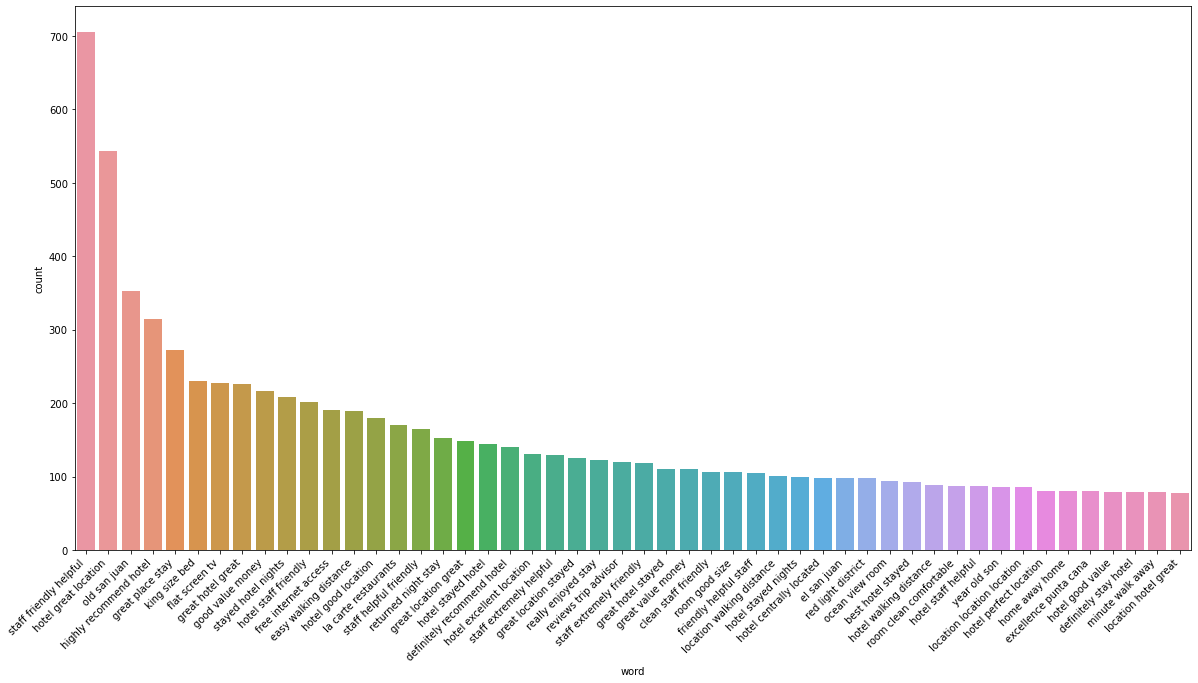

In [28]:
def get_ngrams(data, n=None):
    cv = CountVectorizer(ngram_range=(3,3))
    vectors = cv.fit_transform(data)
    sum_of_words = vectors.sum(axis = 0)
    word_freq = [(word, sum_of_words[0,i]) for word, i in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x : x[1], reverse=True)
    return word_freq[:n]

common_words =  get_ngrams(df.clean_text, 50)
df_ngrams = pd.DataFrame(common_words, columns=['word', 'count'])
fig, ax = plt.subplots(figsize= (20, 10))
fig = sns.barplot(x = 'word', y = 'count', data = df_ngrams, ax = ax)
ax.set_xticklabels(labels = df_ngrams['word'], rotation = 45, ha = 'right')
plt.show()

In [30]:
## Preprocessing

def tokenization(data):
    tokens = word_tokenize(data)
    return tokens
    
def data_cleaning(data):
    clean_data = [i for i in data if (i not in punctuation) and (len(i)>=2)]
    return clean_data

def lower_case(data):
    lower_case = [i.lower() for i in data]
    return lower_case

def stopwords_removal(data):
    text = [i for i in data if i not in stop]
    return text

def lemmatization(data):
    lemma = WordNetLemmatizer()
    text_list = []
    for i in data:
        text = lemma.lemmatize(i)
        text_list.append(text)
    return text_list

In [31]:
tokens = df['Review'].apply(tokenization)
clean_text = tokens.apply(data_cleaning)
lower_text = clean_text.apply(lower_case)
without_stop_text = lower_text.apply(stopwords_removal)
text_lemma = without_stop_text.apply(lemmatization)

In [32]:
# Target Column

def target_creation(data):
    if (data == 1) or (data == 2):
        return 'Not Satisfied'
    elif(data == 3):
        return 'Satisfied'
    elif(data == 4) or (data == 5):
        return 'Happy'

In [33]:
df['Target'] = df.Rating.apply(target_creation)
df

,Review,Rating,clean_text,Target
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,Happy
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,Not Satisfied
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms experience hotel monaco seattle goo...,Satisfied
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Happy
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,Happy
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret time staying charm ca beat ti...,Happy
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,Happy
20488,"ok just looks nice modern outside, desk staff ...",2,ok looks nice modern outside desk staff partic...,Not Satisfied
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,Not Satisfied
